# Project Proposal

In [89]:
library(dplyr)
library(tidyr)
library(psych)
library(GGally)

## Preliminary Results

Firstly, we download the data from the web and save it to the repository.

In [90]:
data <- read.csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
write.csv(data,"house_data.csv")

In [91]:
data <- data %>% drop_na()
head(data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
2,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
3,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
4,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
5,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
6,-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


In [92]:
data <- data %>% mutate(rooms_per_household = total_rooms/households,
                       bedrooms_per_household = total_bedrooms/households,
                       population_per_household = population/households)
head(data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY,6.984127,1.0238095,2.555556
2,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,6.238137,0.9718805,2.109842
3,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY,8.288136,1.0734463,2.802260
4,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY,5.817352,1.0730594,2.547945
5,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY,6.281853,1.0810811,2.181467
6,-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY,4.761658,1.1036269,2.139896


In [93]:
any(is.na(data))

[1] FALSE

After remove the missing values, we can take a glimpse of the head of the dataset. There are 10 columns in the dataset, and we will treat the `median_house_value` as the response variable. The data is already clean and tidy, so we can perform on this dataset without concerning. A summary table of the dataset will also be generated, which is capable to show the relevant statistics for each variable, such as range or scales.

In [94]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
longitude,1,20433,-119.570689,2.003578e+00,-118.490000,-119.519522,1.912554e+00,-124.3500000,-114.31000,10.04000,-0.29609742,-1.3326789,1.401652e-02
latitude,2,20433,35.633221,2.136348e+00,34.260000,35.509782,1.823598e+00,32.5400000,41.95000,9.41000,0.46486602,-1.1197263,1.494534e-02
housing_median_age,3,20433,28.633094,1.259181e+01,29.000000,28.486205,1.482600e+01,1.0000000,52.00000,51.00000,0.06159638,-0.8013262,8.808905e-02
total_rooms,4,20433,2636.504233,2.185270e+03,2127.000000,2294.132563,1.178667e+03,2.0000000,39320.00000,39318.00000,4.15820584,32.7020664,1.528759e+01
total_bedrooms,5,20433,537.870553,4.213851e+02,435.000000,471.438184,2.401812e+02,1.0000000,6445.00000,6444.00000,3.45903841,21.9774569,2.947902e+00
population,6,20433,1424.946949,1.133208e+03,1166.000000,1255.862421,6.508614e+02,3.0000000,35682.00000,35679.00000,4.95928833,74.0349321,7.927637e+00
households,7,20433,499.433465,3.822992e+02,409.000000,441.075610,2.238726e+02,1.0000000,6082.00000,6081.00000,3.41334898,22.0859277,2.674468e+00
median_income,8,20433,3.871162,1.899291e+00,3.536500,3.654762,1.578821e+00,0.4999000,15.00010,14.50020,1.64431547,4.9408607,1.328696e-02
median_house_value,9,20433,206864.413155,1.154357e+05,179700.000000,192768.715972,1.014098e+05,14999.0000000,500001.00000,485002.00000,0.97814626,0.3273379,8.075584e+02


In addition, to give a more intuitive understanding of the data, some plot of the dataset will also be created. As shown in the dataset and summary table, the variable `ocean_proximity` is categorical, so it is meaningful to generate a histogram for this variable. 

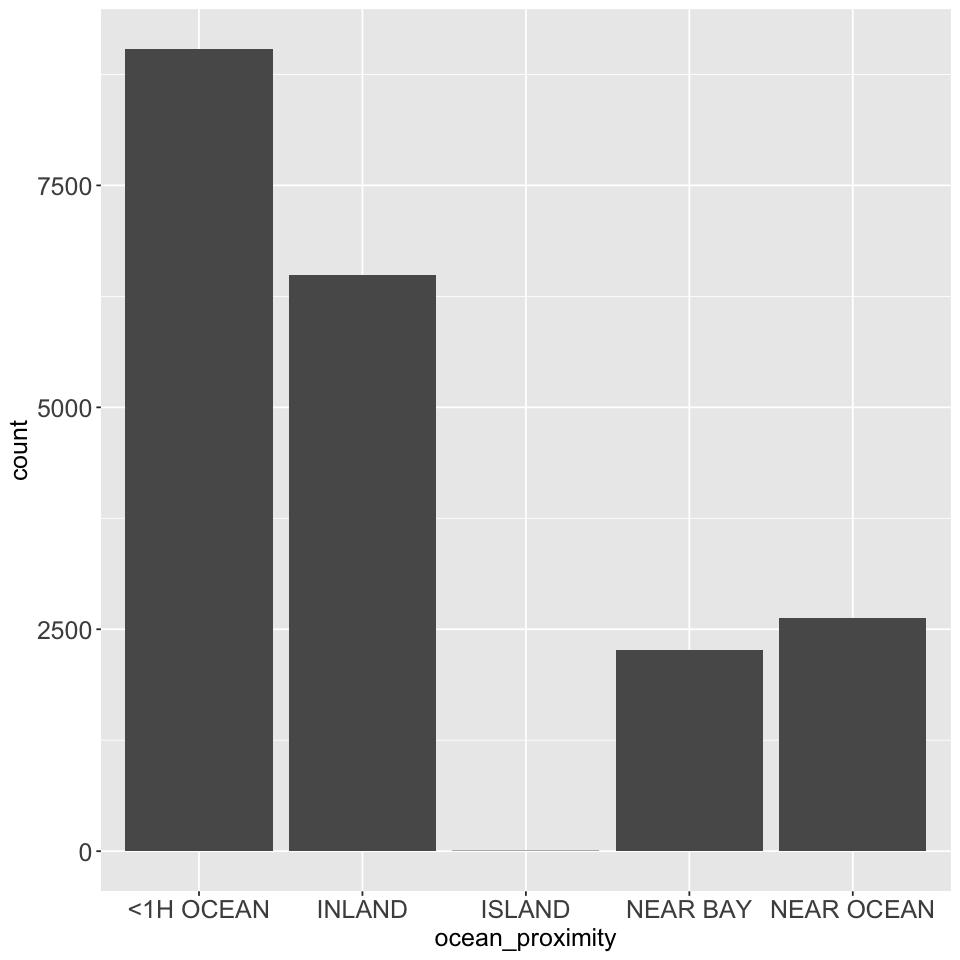

In [95]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data, aes(x=ocean_proximity)) + 
    geom_bar() + 
    theme(axis.text = element_text(size = 15),
         axis.title.x=element_text(size = 15),
         axis.title.y=element_text(size = 15))  

For the rest explanatory variables, they are all continuous, so it makes sense to generate a scatter plot matrix to find if there are patterns between each of them and the response variable.

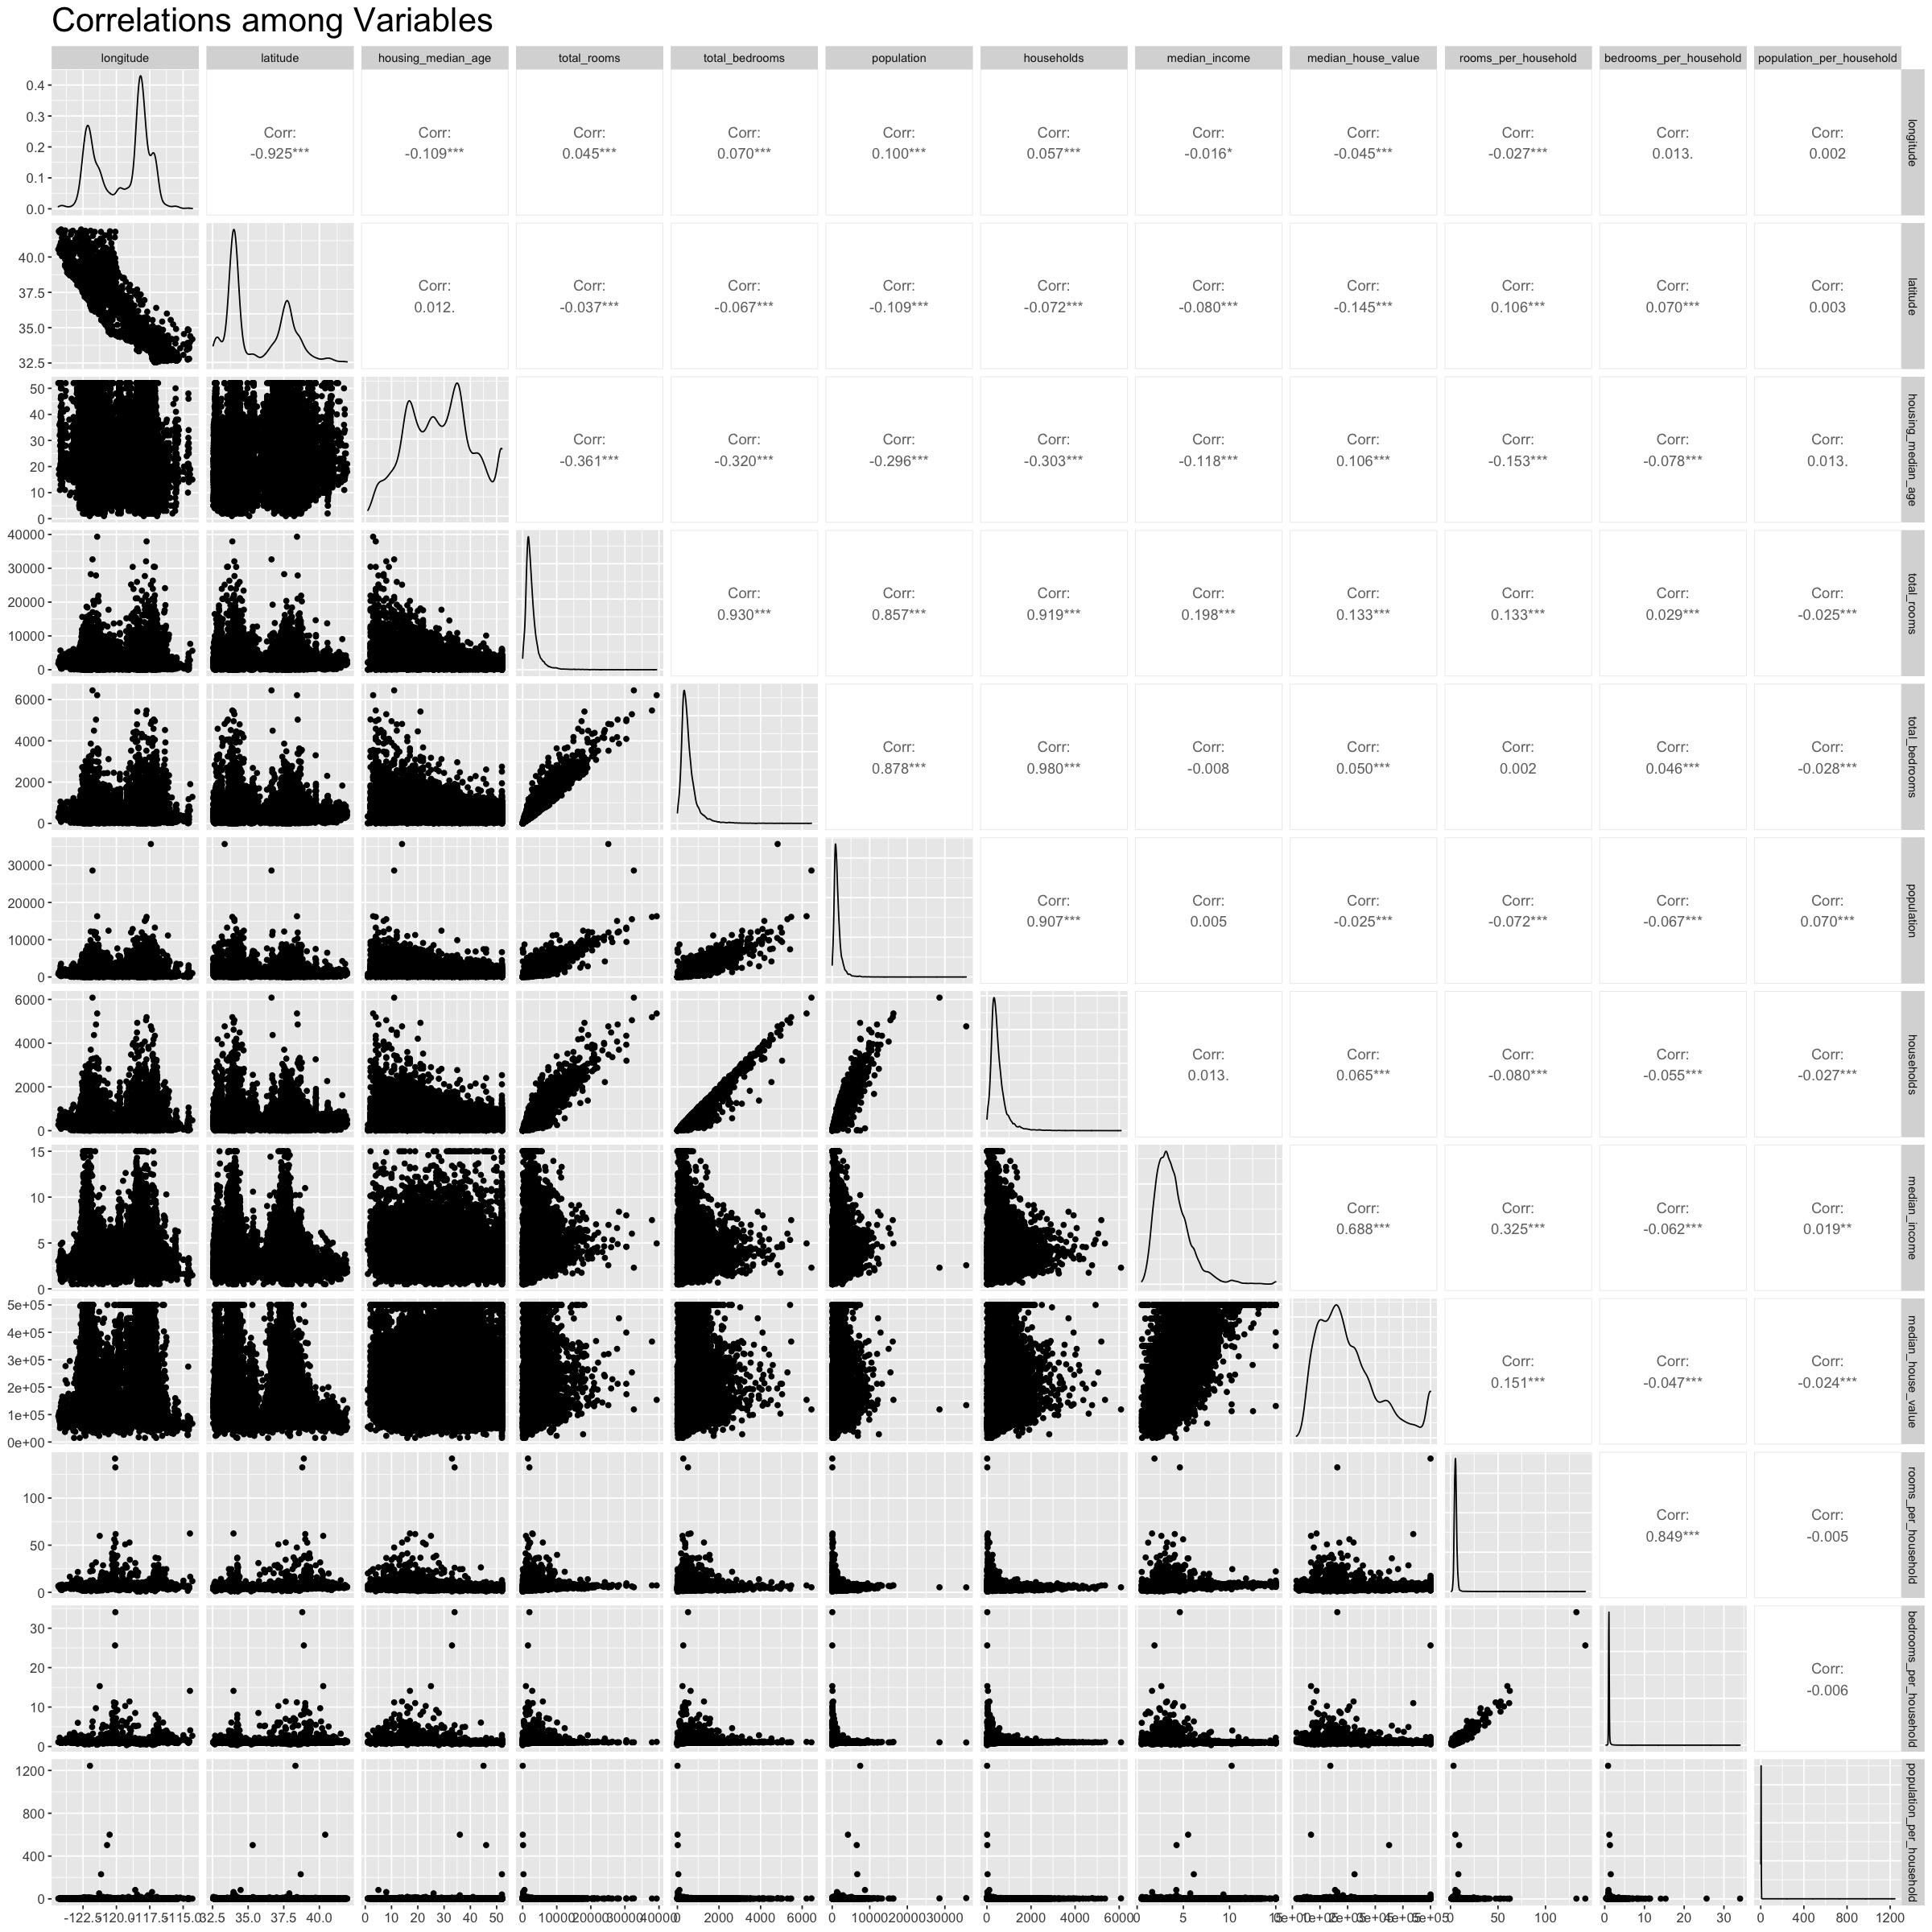

In [96]:
options(repr.plot.width=20, repr.plot.height=20)
data_pairs <- data %>% select(!"ocean_proximity")
ggpairs(data_pairs, title = "Correlations among Variables") + 
    theme(axis.text = element_text(size = 10),
         plot.title = element_text(size = 25))